In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('D:\\AI STUDY MATERIAL\\ML\\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data=data.drop('id',1)

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 20 columns):
date             21611 non-null object
price            21611 non-null float64
bedrooms         21611 non-null int64
bathrooms        21611 non-null float64
sqft_living      21611 non-null int64
sqft_lot         21611 non-null int64
floors           21611 non-null float64
waterfront       21611 non-null int64
view             21611 non-null int64
condition        21611 non-null int64
grade            21611 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21611 non-null int64
yr_built         21611 non-null int64
yr_renovated     21611 non-null int64
zipcode          21611 non-null int64
lat              21611 non-null float64
long             21611 non-null float64
sqft_living15    21611 non-null int64
sqft_lot15       21611 non-null int64
dtypes: float64(6), int64(13), object(1)
memory usage: 3.5+ MB


In [8]:
data['date']=pd.to_datetime(data['date'])
data['Month']=data['date'].dt.month
data['Year']=data['date'].dt.year
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [9]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Year'],
      dtype='object')

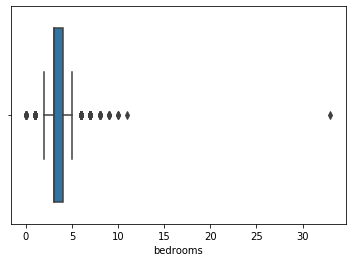

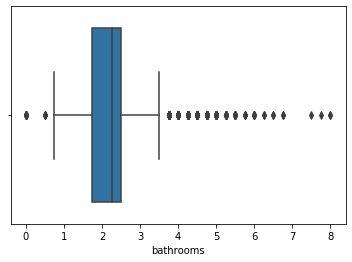

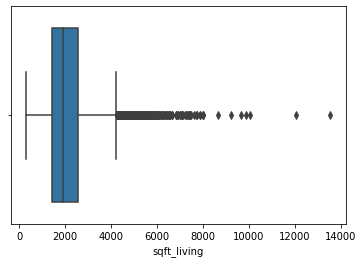

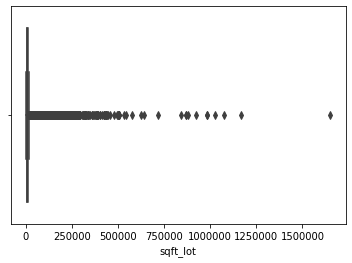

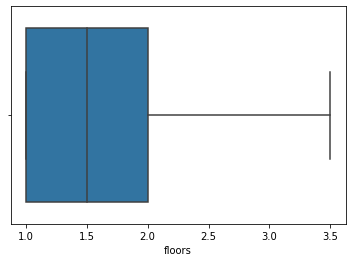

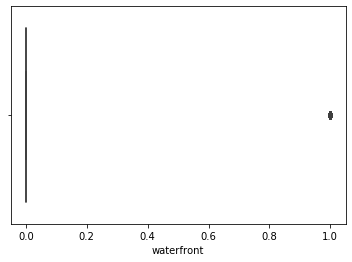

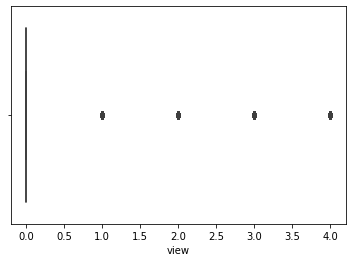

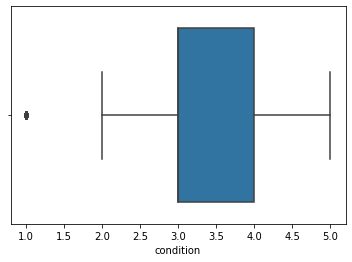

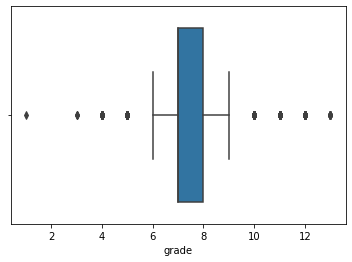

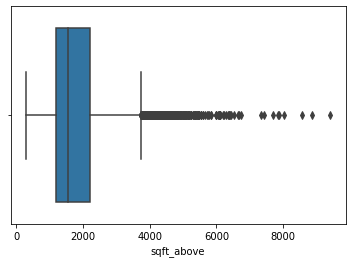

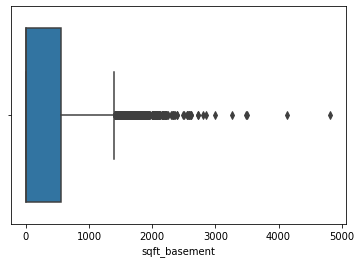

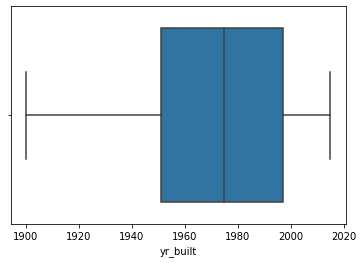

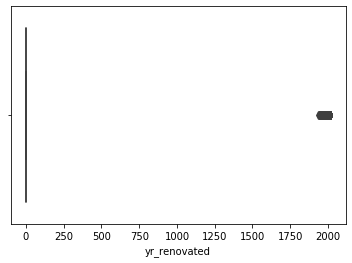

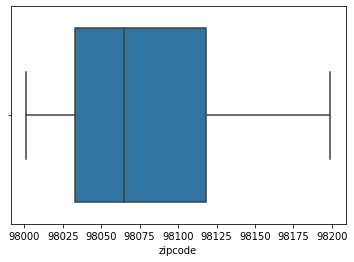

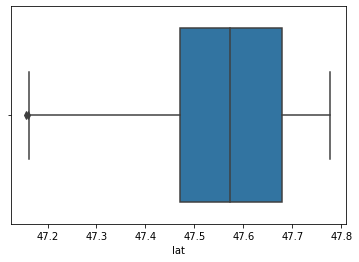

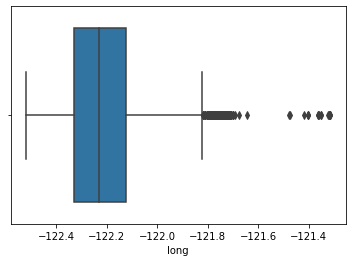

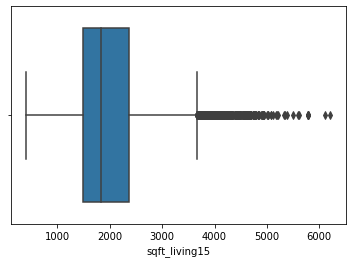

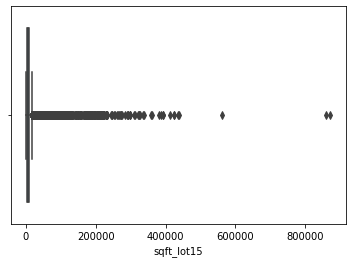

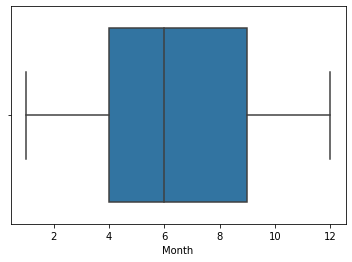

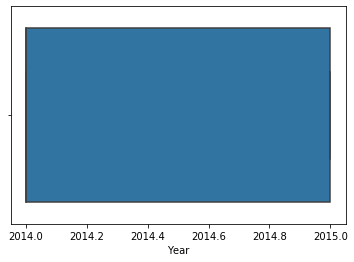

In [10]:
#checking the outliers using boxplot 
labels=[u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot',
       u'floors', u'waterfront', u'view',u'condition',u'grade', u'sqft_above',
       u'sqft_basement', u'yr_built', u'yr_renovated', u'zipcode', u'lat', u'long',
       u'sqft_living15', u'sqft_lot15', u'Month', u'Year']
for i in range(len(labels)):
    plt.figure()
    sb.boxplot(x=data[labels[i]])
    plt.xlabel(labels[i])

In [11]:
data['bedrooms'].value_counts()

3     9823
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
np.where(data['bedrooms']==33),np.where(data['bedrooms']==11)

((array([15868], dtype=int64),), (array([8755], dtype=int64),))

In [13]:
data=data.drop(data.index[15868])
data=data.drop(data.index[8755])
data.shape

(21609, 22)

In [14]:
np.where(data['sqft_living']>12000)

(array([ 7250, 12774], dtype=int64),)

In [15]:
data=data.drop(data.index[7250])
data=data.drop(data.index[12774])
data.shape

(21607, 22)

In [16]:
np.where(data['sqft_lot']>1500000)

(array([1717], dtype=int64),)

In [17]:
data=data.drop(data.index[1717])
data.shape

(21606, 22)

In [18]:
np.where(data['sqft_lot15']>800000)

(array([ 9709, 20445], dtype=int64),)

In [19]:
data=data.drop(data.index[9709])
data=data.drop(data.index[20445])
data.shape

(21604, 22)

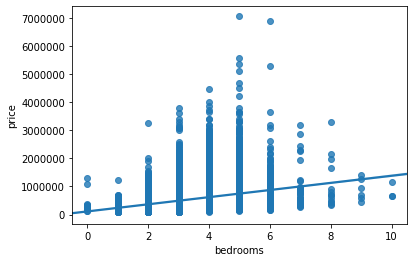

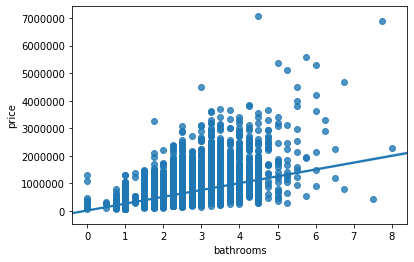

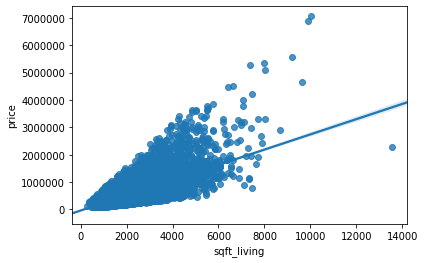

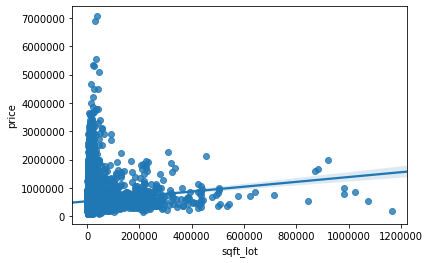

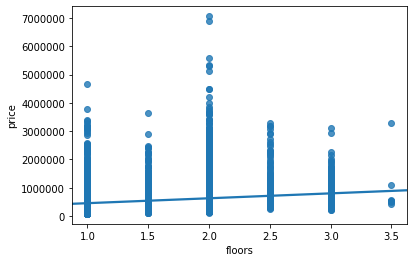

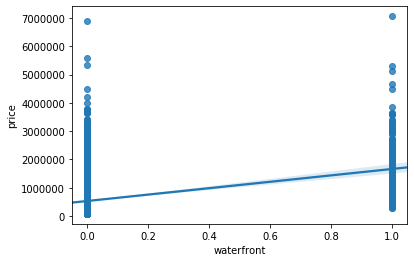

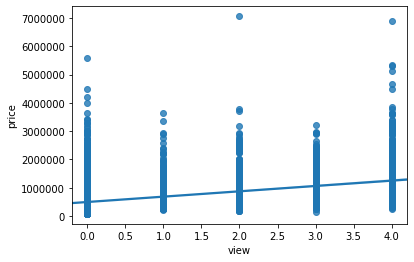

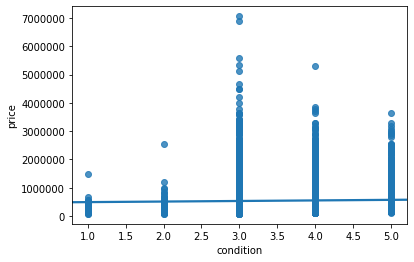

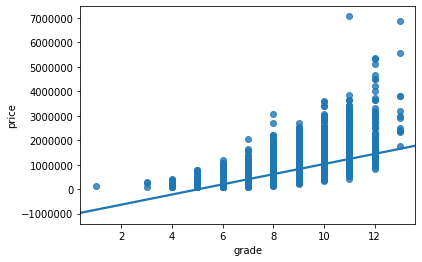

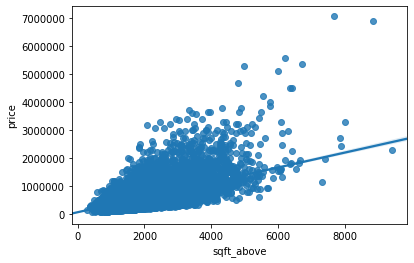

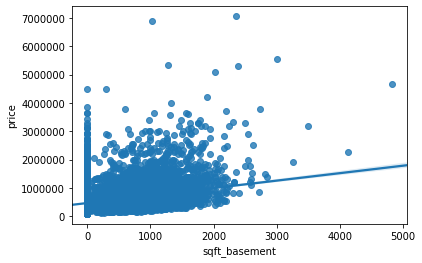

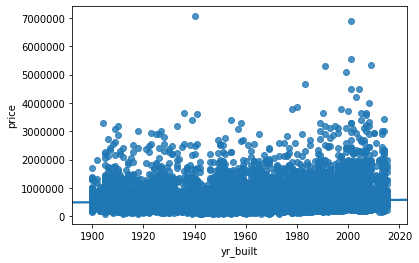

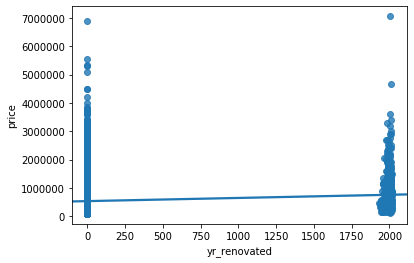

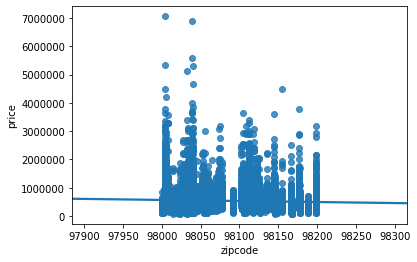

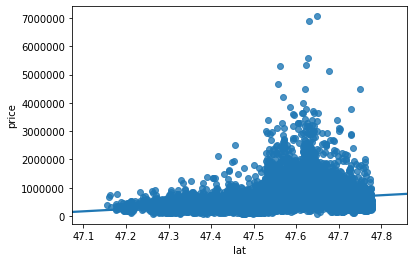

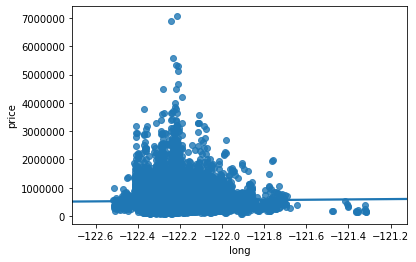

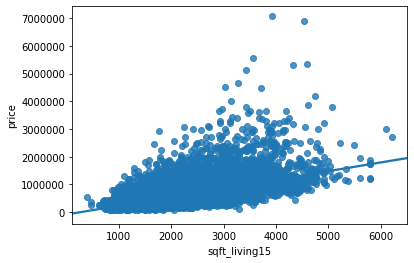

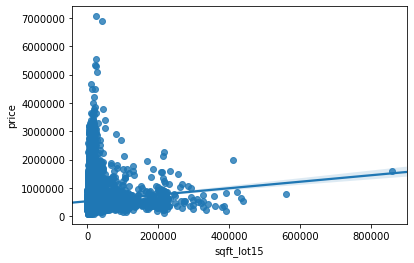

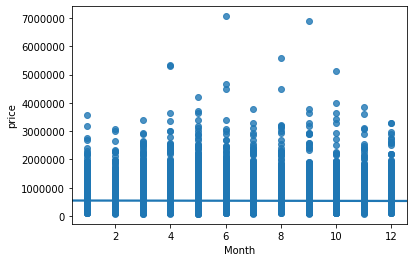

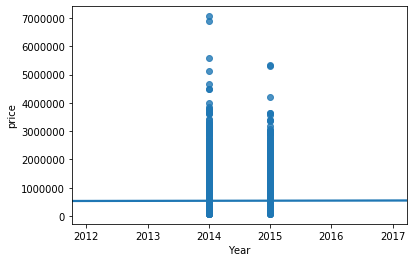

In [20]:
#check the linearity between predictor variable and response variables
#our response variable is price 
labels=[u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot',
       u'floors', u'waterfront', u'view',u'condition',u'grade', u'sqft_above',
       u'sqft_basement', u'yr_built', u'yr_renovated', u'zipcode', u'lat', u'long',
       u'sqft_living15', u'sqft_lot15', u'Month', u'Year']
for i in range(len(labels)):
    plt.figure()
    sb.regplot(x=data[labels[i]],y='price',data=data);
    plt.xlabel(labels[i])
    plt.ylabel('price')

In [21]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Year'],
      dtype='object')

In [22]:
x=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Year']]
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [23]:
y=data[['price']]
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [24]:
import statsmodels.api as sm

In [25]:
x1=sm.add_constant(x)

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
model1=sm.OLS(y,x1)
model1=model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2691.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:40:41   Log-Likelihood:            -2.9417e+05
No. Observations:               21604   AIC:                         5.884e+05
Df Residuals:                   21584   BIC:                         5.885e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.809e+07   9.82e+06     -6.934      0.000   -8.73e+07   -4.88e+07
bedrooms      -3.767e+04   1949.698    -19.322      0.000   -4.15e+04   -3.39e+04
bathrooms      4.131e+04   3213.343     12.855      0.000     3.5e+04    4.76e+04
sqft_living     108.3240      2.257     47.990      0.000     103.900     112.748
sqft_lot          0.1001      0.049      2.030      0.042       0.003       0.197
floors         7575.1763   3547.234      2.136      0.033     622.336    1.45e+04
waterfront      5.88e+05   1.71e+04     34.352      0.000    5.54e+05    6.22e+05
view            5.18e+04   2111.039     24.536      0.000    4.77e+04    5.59e+04
condition      2.774e+04   2322.307     11.943      0.000    2.32e+04    3.23e+04
grade          9.669e+04   2124.951     45.502      0.000    9.25e+04    1.01e+05
sqft_above       69.1354      2.229     31.022      0.000      64.767      73.504
sqft_basement    39.1598      2.614     14.979      0.000      34.036      44.284
yr_built      -2595.3818     71.666    -36.215      0.000   -2735.853   -2454.910
yr_renovated     19.4252      3.607      5.385      0.000      12.355      26.495
zipcode        -582.9434     32.525    -17.923      0.000    -646.695    -519.192
lat            6.055e+05   1.06e+04     57.187      0.000    5.85e+05    6.26e+05
long          -2.139e+05    1.3e+04    -16.505      0.000   -2.39e+05   -1.88e+05
sqft_living15    24.7624      3.404      7.275      0.000      18.091      31.434
sqft_lot15       -0.3368      0.074     -4.561      0.000      -0.482      -0.192
Month          1233.9947    696.431      1.772      0.076    -131.061    2599.051
Year           3.711e+04   4648.686      7.982      0.000     2.8e+04    4.62e+04
==============================================================================
Omnibus:                    17194.098   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1334556.191
Skew:                           3.279   Prob(JB):                         0.00
Kurtosis:                      40.941   Cond. No.                     1.20e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Since p-value for the Month variable is more than 0.05 hence we will accept the null hypothesis, i.e there is no relation between the variable Month and respond price.

In [28]:
x=x.drop('Month',1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
model.coef_

array([[-3.83923263e+04,  3.87329348e+04,  8.80493297e+01,
         1.09440144e-01,  8.43482505e+03,  6.64593369e+05,
         4.96429097e+04,  2.81553208e+04,  9.54224300e+04,
         8.98784913e+01,  6.32325694e+01, -2.54136355e+03,
         2.01298790e+01, -5.72987799e+02,  5.99013425e+05,
        -2.10164392e+05,  2.34094983e+01, -3.97711350e-01,
         2.75249724e+04]])

In [32]:
model.intercept_

array([-49088034.31153297])

In [33]:
y_pred=model.predict(x_test)
y_pred[:6]

array([[ 522768.25476715],
       [ 749346.9759236 ],
       [ 460482.70209653],
       [1026553.61595128],
       [ 753658.08830328],
       [ 267593.23415048]])

In [34]:
accuracy=model.score(x_test,y_test) 
accuracy

0.6798134384090359

In [35]:
model.score(x_train,y_train)

0.7088153010830405

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6798134384090359

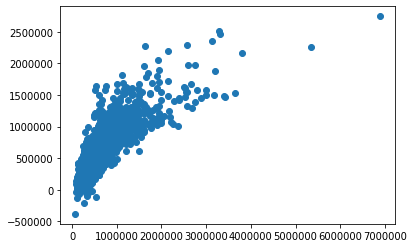

In [37]:
plt.scatter(x=y_test,y=y_pred)

In [38]:
#now we want to predict for

#'bedrooms'=10, 'bathrooms'=3, 'sqft_living'=3968, 'sqft_lot'=8846,'floors'=3, 'waterfront'=0, 'view'=3, 'condition'=5,
#'grade'10, 'sqft_above'=2000,'sqft_basement'=0, 'yr_built'=1964, 'yr_renovated'=1991,
#'zipcode'=98115, 'lat'=47.6848, 'long'=-122.291,'sqft_living15'=2733, 'sqft_lot15'=8988,'Year'=2015

In [39]:
model.predict([[10,3,3968,8846,3,0,3,5,10,2000,0,1964,1991,98115,47.6848,-122.291,2733,8988,2015]])

array([[1061994.76718621]])